In [50]:
import pandas as pd
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.model_selection import GridSearchCV 
%config Completer.use_jedi = False
import warnings
warnings.filterwarnings('ignore')

In [51]:
df=pd.read_excel('Form.xlsx')

In [52]:
df.rename(columns={
    
    'Horodateur':'Date','Combien de lignes de téléphonie mobile possédez vous?':'Nb_Lignes',
    'Quel est votre opérateur téléphonique principal?':'Opert_Princ','Quel est votre âge ?':'Age',
    'Dans quel gouvernorat vous passez le plus de temps  ? ( lieu d\'habitat / de travail / d\'étude .. )':'City',
    'Quel est votre degré de satisfaction à l\'égard de votre opérateur téléphonique principal ?':'Satisfaction_Global',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Couverture réseau de votre région]':'Coverage',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Qualité des appels téléphoniques]':'Call_Quality',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Qualité de connexion à l\'internet]':'Network_Quality',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Promotions et bonus]':'Promotions_Rate',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Prix d\'abonnement actuel ]':'Subscription_Price_Rate',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Tarifs des communications locales]':'Local_Comm_Price_Rate',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Tarifs des communications internationales]':'Inter_Comm_Price_Rate',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Tarif du roaming international ]':'Roaming_Price_Rate',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Tarif de l\'internet mobile ]':'Internet_Price_Rate',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Tarif des sms ]':'Sms_Price_Rate',
    'A l\'égard de ce même opérateur , veuillez donner votre note de satisfaction entre 0 et 10 :  [Service clientèle ]':'Service_Client_Rate'
},inplace=True)

In [53]:
df['Date']=df['Date'].dt.date
df.drop('Date',axis=1,inplace=True)

In [54]:

cols=['Age']
df = df.apply(lambda col: col.str.replace('Entre ', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' et ', '-') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('ans .', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace('Moins de ', '') if col.name in cols else col)
df = df.apply(lambda col: col.str.replace(' ans-plus .', '') if col.name in cols else col)


In [55]:
df['Age']

0      18-25 
1      18-25 
2      18-25 
3      18-25 
4      18-25 
        ...  
189    18-25 
190    18-25 
191    18-25 
192    18-25 
193    18-25 
Name: Age, Length: 194, dtype: object

In [56]:
df.replace({'J\'utilise pas ce service':0,'Je n\'utilise pas ce service':0},inplace=True)

In [57]:
from sklearn.compose import make_column_selector
numerical=make_column_selector(dtype_include=np.number)
numeric=df[numerical]
numeric.drop('Nb_Lignes',axis=1,inplace=True)

In [58]:
df['note']=numeric.mean(axis=1).round()

In [59]:
from sklearn.model_selection import train_test_split
trainset,testset = train_test_split(df,test_size=0.25,random_state=0)

In [60]:
def preprocessing(df):
    for column in df.columns:
        if df.dtypes[column] =='object':  
            df[column]=pd.factorize(df[column])[0] 
    X= df.drop('note',axis=1)
    Y= df['note']
    return X,Y

In [61]:
X_train , y_train = preprocessing(trainset)

In [62]:
X_test , y_test= preprocessing(testset)

In [63]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report
def evaluation(model):
    from sklearn.metrics import plot_confusion_matrix
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)    
    print(classification_report(y_test, ypred))    

In [64]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()

In [76]:
evaluation(Knn)
scoreKnn=Knn.score(X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.64      0.88      0.74         8
         2.0       0.00      0.00      0.00         3
         3.0       1.00      0.50      0.67         8
         4.0       0.44      1.00      0.61         7
         5.0       0.67      0.25      0.36         8
         6.0       0.83      0.71      0.77         7
         7.0       0.33      1.00      0.50         2
         8.0       0.50      0.25      0.33         4
         9.0       0.00      0.00      0.00         1

    accuracy                           0.57        49
   macro avg       0.44      0.46      0.40        49
weighted avg       0.61      0.57      0.53        49



In [66]:
a=20
print(Knn.predict([X_test.iloc[a]]))
y_test.iloc[a]

[5.]


6.0

In [77]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
evaluation(RandomForest)
scoreRandomForest=RandomForest.score(X_test,y_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         8
         2.0       0.40      0.67      0.50         3
         3.0       0.80      0.50      0.62         8
         4.0       0.38      0.71      0.50         7
         5.0       0.50      0.12      0.20         8
         6.0       0.50      0.43      0.46         7
         7.0       0.20      0.50      0.29         2
         8.0       1.00      0.50      0.67         4
         9.0       0.50      1.00      0.67         1

    accuracy                           0.57        49
   macro avg       0.63      0.64      0.59        49
weighted avg       0.65      0.57      0.56        49



In [78]:
from xgboost import XGBClassifier                         
import xgboost as xgb
model_xgb=XGBClassifier()
evaluation(model_xgb)
scorexgb=model_xgb.score(X_test,y_test)

[04:28:50] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

         0.0       0.50      1.00      0.67         1
         1.0       1.00      0.62      0.77         8
         2.0       0.29      0.67      0.40         3
         3.0       0.75      0.38      0.50         8
         4.0       0.33      0.57      0.42         7
         5.0       0.33      0.12      0.18         8
         6.0       0.67      0.57      0.62         7
         7.0       0.00      0.00      0.00         2
         8.0       0.67      1.00      0.80         4
         9.0       0.50      1.00      0.67         1

    accuracy                           0.51        49
   macro avg       0.50      0.59      0.50        49
weighted avg       0.58      0.51      0.50

In [79]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train, y_train)
evaluation(CV_rfc.best_estimator_)
scoreCV_rfc=CV_rfc.score(X_test,y_test)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         1
         1.0       1.00      1.00      1.00         8
         2.0       0.33      0.67      0.44         3
         3.0       0.80      0.50      0.62         8
         4.0       0.42      0.71      0.53         7
         5.0       0.67      0.25      0.36         8
         6.0       0.60      0.43      0.50         7
         7.0       0.20      0.50      0.29         2
         8.0       1.00      0.50      0.67         4
         9.0       0.50      1.00      0.67         1

    accuracy                           0.59        49
   macro avg       0.65      0.66      0.61        49
weighted avg       0.69      0.59      0.60        49



In [81]:
from sklearn.naive_bayes import GaussianNB 
GaussianNB = GaussianNB()
GaussianNB.fit(X_train,y_train)
evaluation(GaussianNB)
scoreGaussianNB=GaussianNB.score(X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.80      1.00      0.89         8
         2.0       1.00      0.67      0.80         3
         3.0       0.83      0.62      0.71         8
         4.0       0.45      0.71      0.56         7
         5.0       0.43      0.38      0.40         8
         6.0       0.67      0.57      0.62         7
         7.0       0.50      1.00      0.67         2
         8.0       0.67      0.50      0.57         4
         9.0       0.00      0.00      0.00         1

    accuracy                           0.63        49
   macro avg       0.53      0.55      0.52        49
weighted avg       0.63      0.63      0.62        49



In [82]:
from sklearn.linear_model import LogisticRegression
param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'max_iter': [100,1000, 2000, 3000]}
grid_LogisticRegression=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid_LogisticRegression.fit(X_train,y_train)
evaluation(grid_LogisticRegression.best_estimator_)
scoregrid_LogisticRegression=grid_LogisticRegression.score(X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.70      0.88      0.78         8
         2.0       0.33      0.33      0.33         3
         3.0       1.00      0.88      0.93         8
         4.0       0.50      0.71      0.59         7
         5.0       0.50      0.25      0.33         8
         6.0       0.67      0.57      0.62         7
         7.0       0.25      0.50      0.33         2
         8.0       1.00      0.50      0.67         4
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         0

    accuracy                           0.59        49
   macro avg       0.45      0.42      0.42        49
weighted avg       0.64      0.59      0.59        49



In [83]:
from sklearn.tree import DecisionTreeClassifier
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,29)}
gridDecisionTree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=6)
gridDecisionTree.fit(X_train,y_train)
evaluation(gridDecisionTree.best_estimator_)
scoregridDecisionTree=gridDecisionTree.score(X_test,y_test)

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.86      0.75      0.80         8
         2.0       0.25      0.67      0.36         3
         3.0       1.00      0.12      0.22         8
         4.0       0.50      0.71      0.59         7
         5.0       0.33      0.25      0.29         8
         6.0       0.60      0.43      0.50         7
         7.0       0.00      0.00      0.00         2
         8.0       0.33      0.25      0.29         4
         9.0       0.00      0.00      0.00         1
        10.0       0.00      0.00      0.00         0

    accuracy                           0.41        49
   macro avg       0.35      0.29      0.28        49
weighted avg       0.56      0.41      0.41        49



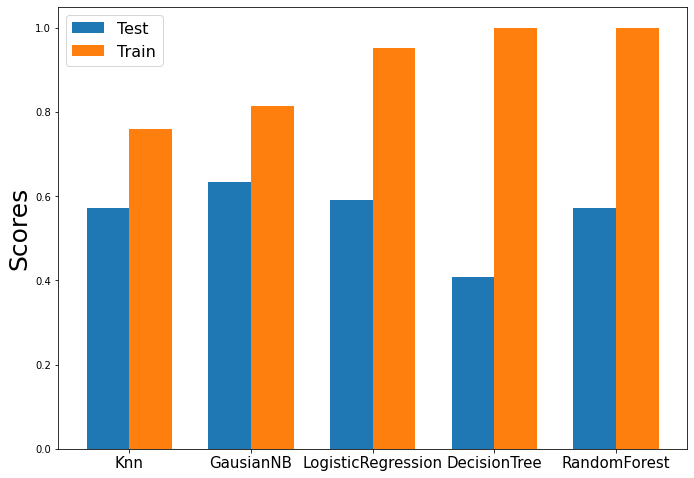

In [154]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


labels = ['Knn', 'GausianNB', 'LogisticRegression', 'DecisionTree','RandomForest']
scoreKnn=Knn.score(X_test,y_test)
scoreGaussianNB=GaussianNB.score(X_test,y_test)
scoregrid_LogisticRegression=grid_LogisticRegression.score(X_test,y_test)
scoregridDecisionTree=gridDecisionTree.score(X_test,y_test)
scoreRandomForest=RandomForest.score(X_test,y_test)

trainscoreKnn=Knn.score(X_train,y_train)
trainscoreGaussianNB=GaussianNB.score(X_train,y_train)
trainscoregrid_LogisticRegression=grid_LogisticRegression.score(X_train,y_train)
trainscoregridDecisionTree=gridDecisionTree.score(X_train,y_train)
trainscoreRandomForest=RandomForest.score(X_train,y_train)

test = [scoreKnn, scoreGaussianNB, scoregrid_LogisticRegression, scoregridDecisionTree,scoreRandomForest]
train = [trainscoreKnn, trainscoreGaussianNB, trainscoregrid_LogisticRegression, trainscoregridDecisionTree,trainscoreRandomForest]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, test, width, label='Test')
rects2 = ax.bar(x + width/2, train, width, label='Train')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores',fontsize = 25)
ax.set_xticks(x)
ax.set_xticklabels(labels,fontsize = 15)
ax.legend(fontsize = 16)
fig.set_figheight(7)
fig.set_figwidth(10)
fig.tight_layout(pad=2,h_pad=3,w_pad=3)
fig.savefig('comp.jpg')
plt.show()
